<div style="text-align:center"><span style="font-family:Georgia; font-size:2em;"> <u> Projet 8 : </u> </span></div>
<br>
<div style="text-align:center"><span style=" font-family:Georgia; font-size:2em;"> Techniques de réduction de variance pour la méthode de Monte-Carlo </span></div>

<br>
<br>

# Chargement de l'environnement 


In [362]:
%matplotlib inline
# importe les bibliothèques, on utilise les alias canoniques
import numpy as np
import matplotlib.pylab as PLT
import numpy.random as npr
import scipy.stats as sps
import scipy.integrate as integrate
import seaborn as sns
from decimal import *
import math
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats

AMELIORATION : mettre un % de meilleur estimateur 
IntERVALLE DE CONFIANCE: METTRE LES EPSILON

In [363]:
#Modules en plus pour embellir le notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

print(" ** Setup Complete ** ")

 ** Setup Complete ** 


In [364]:
#Nombre d'essais
N= 10000

<br>
<div style="text-align:left"><span style=" font-family:Georgia; font-size:1.9em;"> <u> <bold> I - </bold> </u> <u><bold> Introduction </bold> </u> </span></div>


<div style="text-align:left"><span style=" font-family:Georgia; font-size:1.3em;"> <bold> 1. Déterminer $n$ t.q : $ \mathrm{P}\big( |J_{2n}-I | \geq \epsilon \big) \leq 0.95 $, $\space$ avec $\epsilon = \space 0.1 , 0.05 $ </bold>  </span></div>
    

Soit $U$ une variable aléatoire de loi uniforme sur $[0,1]$. 
f est définie sur [0,1] et de carré intégrable, donc $ \int_{0}^{1} |f(x)| dx $ converge.
<br>
Par théorème de transfert on obtient $\mathbb{E}(f(U)) = \int_{0}^{1} f(x) dx = I$. Par linéarité, il suit que  $\forall{n \in \mathbb{N}}, \mathbb{E}(J_{n})=I $. 
<br>
<br>
Notons : $ \epsilon_{n} = J_{n}-I $
On remarque déjà que $ \epsilon_{n} $ est :
<br>
- intégrable et que $ \mathbb{E}(\epsilon_{n})=0 $
<br>
- de carré intégrable
   
<br>
La probabilité qu'on va étudier est :
$$
P \left( [| \epsilon_{2n} | \geq \epsilon]\right)
$$
<br>
On peut réécrire
$$
1-P([| \space \epsilon_{2n} | < \epsilon \space])\geq 1-0.95
$$
$$
\iff P([| \epsilon_{2n} | < \epsilon])\geq 0.95
$$
<br>
Calculons donc $ P([| \epsilon_{2n} | < \epsilon])$ pour $ \epsilon $ donné :
<br>
<br>
$$
\begin{align}
P([ | \epsilon_{2n} | < \epsilon]) 
&= P([- \epsilon < \epsilon_{2n}  < \epsilon]) \\
\end{align}
$$
<br>
En notant $\sigma$ l'écart type de $f(U_{1})$ :
$$
\begin{align}
P([ | \epsilon_{2n} | < \epsilon])  &= P\left(\left[\frac{\sqrt{2n}}{\sigma}(- \epsilon) < \frac{\sqrt{{2n}}}{\sigma} \epsilon_{2n} < \frac{\sqrt{2n}}{\sigma} \epsilon \right] \right) 
\end{align}
$$
<br>
On peut appliquer le <em> Théorème Centrale Limite </em> aux variables $(f(U_{i}))_{i=1....2n}$, qui  sont indépendantes identiquement distribuées (car les $ (U_{i})_{i=1...2n} $ sont elles mêmes i.i.d, et les fonctions considérées sont elles-mêmes continues), et de carré intégrable.
<br>
Pour n grand, on a donc :
$$ 
\begin{align}
P([ | \epsilon_{2n} | < \epsilon]) 
& \approx \int_{-\epsilon\frac{\sqrt{2n}}{\sigma}}^{\epsilon\frac{\sqrt{2n}}{\sigma}}\frac{e^{-t^2/2}}{\sqrt{2\pi}} \,dt \\
&= 2 \Phi \left( \epsilon \frac{\sqrt{2n}}{\sigma} \right) -1
\end{align}
$$
Par conséquent, on cherche $n$ tel que $ 2\Phi \left( \epsilon \frac{\sqrt{2n}}{\sigma} \right) -1 \geq 0.95 $   <em> i.e </em>   $\Phi \left( \epsilon \frac{\sqrt{2n}}{\sigma} \right) \geq 0.975 $
$\\$
En utilisant le fait que $\Phi^{-1}(0.975)=1.96$, on obtient donc :
<br>
<div class="alert alert-block alert-info"><b>$$ n \geq \frac{(1.96 \sigma)^{2}}{2\epsilon^{2}} $$ </b> </div>

Pour conclure, il suffit donc de trouver pour chaque fonction considérée, $ \sigma $ l'écart type de $X = f(U_{1})$.

<u> Cas 1 : </u>  $ f(x)= x^{2} $


<br>
$ 
\begin{align} 
\mathbb{E}(X) 
&= \int_{0}^{1} f(x) dx \\
&= \int_{0}^{1} x^{2} dx \\
&= \left[ \frac{x^{3}}{3} \right]_{0}^1 \\
&= \frac{1}{3}
\\
\mathbb{E}(X^{2}) 
&= \int_{0}^{1} f(x)^{2} dx \\
&= \int_{0}^{1} x^{4} dx \\
&= \left[ \frac{x^{5}}{5} \right]_{0}^1 \\
&= \frac{1}{5} \\
\sigma^{2}
&= \mathbb{E}(X^{2}) - \mathbb{E}(X)^{2} \\
&= \frac{1}{5} - \frac{1}{9} \\
&= \frac{4}{45}
\end{align}
$

<div class="alert alert-block alert-info">Ainsi dans le cas $ f(x) = x^{2} $: 
<br>
- pour $ \epsilon = 0.1 $ , $n \geq \frac{4}{45} \frac{1.96^{2}}{2(0.1)^{2}} $ <em> $\space$ i.e $\space$ </em> $ n \geq 18 $
<br>
- pour $ \epsilon = 0.05 $ , $n \geq \frac{4}{45} \frac{1.96^{2}}{2(0.05)^{2}} $ <em> $\space$ i.e $\space$ </em> $ n \geq 69 $

<u> Cas 2 : </u>  $ f(x)= e^{x} $
<br>
$ 
\begin{align} 
\mathbb{E}(X) 
&= \int_{0}^{1} f(x) dx \\
&= \int_{0}^{1} e^{x} dx \\
&= \left[ e^{x} \right]_{0}^1 \\
&= e-1
\\
\mathbb{E}(X^{2}) 
&= \int_{0}^{1} f(x)^{2} dx \\
&= \int_{0}^{1} e^{2x} dx \\
&= \left[ \frac{e^{2x}}{2} \right]_{0}^1 \\
&= \frac{e^{2}-1}{2} \\
\sigma^{2}
&=  \mathbb{E}(X^{2}) - \mathbb{E}(X)^{2} \\
&= -\frac{e^{2}}{2}+2e-\frac{3}{2}\\
& \approx 0.24203560745
\end{align}
$
<br>
<br>

<div class="alert alert-block alert-info">Ainsi dans le cas $ f(x) = e^{x} $: 
<br>
- pour $ \epsilon = 0.1 $ , $n \geq \frac{(1.96\sigma)^{2}}{2(0.1)^{2}} $ <em> $\space$ i.e $\space$ </em> $ n \geq 47 $
<br>
- pour $ \epsilon = 0.05 $ , $n \geq \frac{(1.96\sigma)^{2}}{2(0.05)^{2}} $ <em> $\space$ i.e $\space$ </em> $ n \geq 186 $ 

<u> Cas 3 : </u>  $ f(x)= \cos^{2}(2 \pi x) $
<br>
Par intégration par parties :
<br>
$
\begin{align} 
\mathbb{E}(X) 
&= \int_{0}^{1} \cos^{2}(2 \pi x) dx \\
&= 1/2
\\
\mathbb{E}(X^{2}) 
&= \int_{0}^{1} \cos^{4}(2 \pi x) dx \\
&= \frac{3}{8} \\
\sigma^{2} 
&=  \mathbb{E}(X^{2}) - \mathbb{E}(X)^{2} \\
&= \frac{1}{8}
\end{align}
$
<br>
<div class="alert alert-block alert-info"> $ f(x) = \cos^{2}{(2 \pi x)} $: 
<br>
- pour $ \epsilon = 0.1 $ , $n \geq \frac{(1.96*\sigma)^{2}}{2(0.1)^{2}} $ <em> $\space$ i.e $\space$ </em> $ n \geq 24 $
<br>
- pour $ \epsilon = 0.05 $ , $n \geq \frac{(1.96*\sigma)^{2}}{2(0.05)^{2}} $ <em> $\space$ i.e $\space$ </em> $ n \geq 97 $ 

****

## 2. Vérifier empiriquement la convergence de l'estimateur </bold>  </span></div>

### Définition des paramètres : 

In [365]:
#Tailles des échantillons (ie indice n de I2n)
n=200
#Précision choisie (approximation de l'intégrale et de la valeur émpirique de la méthode de MC)
prec=.6

### Définition des fonctions f1,f2,f3 : 

In [366]:
# Définition des fonctions utilisées
def f1(x):
    return x*x

def f2(x):
    return np.exp(x)

def f3(x):
    return np.cos(2*np.pi*x)**2

### Fonctions de base pour la question :

In [367]:
def J(n,f):
    return 1/n*np.sum(f(npr.rand(1,n)))

#Fonction permettant de simuler un grand nombre de fois la méthode de Monte-Carlo à n échantillons et renvoie la moyenne des N simulations
def Moyenne_MonteCarlo(N,n,f):
    M=0
    for i in range(N):
        M=M+J(n,f)
    return M/N

In [368]:
#Fonctions String : ces fonctions permettent d'avoir une idée de l'erreur
def Calcul_Intégrale(f):
    return integrate.quad(lambda x: f(x),0,1)[0]


#J'ai le calcul de l'intégrale dans le cas le plus général
def calcul_intégrale_exacte(i):
    if(i==1):
        return 1/3
    elif(i==2):
        return np.exp(1)-1
    else:
        return 1/2

Nous allons illustrer la convergence de deux manières distinctes : 
- la première sera numérique : on fait tourner l'algorithme un grand nombre de fois (N) à n fixé, et on calcule la valeur ainsi obtenue, qu'on compare à l'intégrale
- la seconde sera graphique : on prend un n arbitrairement grand 

In [369]:
#Fonction qui stocke les différentes valeurs de J obtenues de 0 à n :
def newJ(f,n):
    J=[]
    U=[]
    S=0
    i=1
    while(i<=n):
        S=(S*(i-1)+f(npr.rand()))/i
        J.append(S)
        U.append(np.abs(S-integrate.quad(lambda x: f(x),0,1)[0]))
        i=i+1
    return U

### Illustration de la convergence graphiquement 

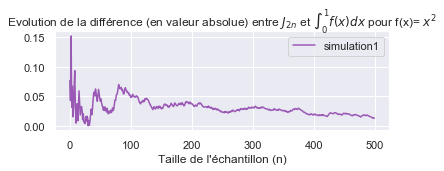

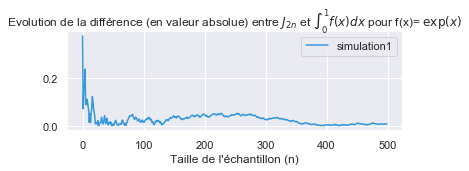

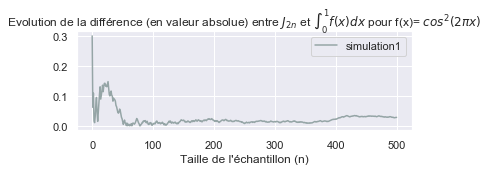

In [426]:
#Fonction qui représente l'évolution de 0 à n des simulations de MC
def plotMMC(f,n,nom_fonction):
    X = np.arange(n) # entiers [0, n]
    F1=newJ(f,n)
    plt.plot(X,F1,label="simulation1") # graphique de la simulation
    plt.legend(loc="best")
    plt.xlabel("Taille de l'échantillon (n)")
    plt.title("Evolution de la différence (en valeur absolue) entre "+r'$J_{2n}$'+" et "+r'$\int_{0}^{1} f(x) dx$'+' pour f(x)= '+nom_fonction)
    plt.show() # affiche dans le notebook
    
n=500
flatui = ["#9b59b6"]
sns.set_palette(flatui)
plt.tight_layout()
plt.subplot(2,1,1)
flatui=["#3498db"]
sns.set_palette(flatui)
plotMMC(f1,n,r'$x^2$')
plt.subplot(2,1,1)
plotMMC(f2,n,r'$\exp(x)$')
flatui=["#95a5a6"]
sns.set_palette(flatui)
plt.subplot(2,1,1)
plotMMC(f3,n,r'$cos^{2}(2 \pi x)$')

Les trois graphiques montre que la différence $ \big|J_{2n}-I \big| $décroît très rapidement et semble tendre vers 0, ce qui illustre graphiquement la convergence de l'estimateur. J'invite l'utilisateur à changer le paramètre n (notamment à le mettre à 5000, pour encore mieux illustrer la convergence de l'estimateur)

## 2 - Initiative personnelle -  Vérification de la relation <em> (8.1) </em> par simulation d'invervalle de confiance 

In [371]:
def simulation_proba_intervalle_confiance(N,n,f,eps):
    S=0
    for i in range(N):
        #On calcule pour chaque i de 0 ... N si la variable J2n simulée est à une distance de plus de epsilon de I
        if(np.abs(J(2*n,f)-Calcul_Intégrale(f))<eps):
            S=S+1
    return S/N

In [418]:
def simulation_intervalle_confiance(N,n,f,eps):
    S=0
    V=[]
    for i in range(N):
        #On calcule pour chaque i de 0 ... N si la variable J2n simulée est à une distance de plus de epsilon de I
        V.append(np.abs(J(2*n,f)))
        if(np.abs(J(2*n,f)-Calcul_Intégrale(f))<eps):
            S=S+1
    P=S/N
    return P,V

def graph_intervalle_confiance(N,f,couleur_choisie,nom_fonction):
    fig = PLT.figure(num=0,figsize=(8,3))
    fig.suptitle(nom_fonction, fontsize=18)
    sns.set(color_codes=True)
    EPS=[0.05,0.1]
    var=(integrate.quad(lambda x: f(x)**2,0,1)[0])-(integrate.quad(lambda x: f(x),0,1)[0])**2
    for i in range(2):
        n=math.ceil(var*1.96**2/(2*(EPS[i]**2)))
        eps=EPS[i]
        plt.subplot(1,2,i+1)
        P,V=simulation_intervalle_confiance(N,n,f,eps)
        sns.distplot(V,bins=10,kde=False,rug=False,color=couleur_choisie)
        plt.vlines(Calcul_Intégrale(f)-eps,0,1000,colors="firebrick").set_linestyle("--")
        plt.vlines(Calcul_Intégrale(f)+eps,0,1000,colors="firebrick").set_linestyle("--")
        plt.xlabel("Valeurs des "+str(r'$J_{2n}$')+" simulés")
        plt.title("probabilité obtenue : " + str(P)) 
    plt.show() 

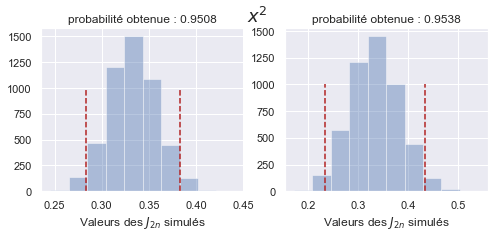

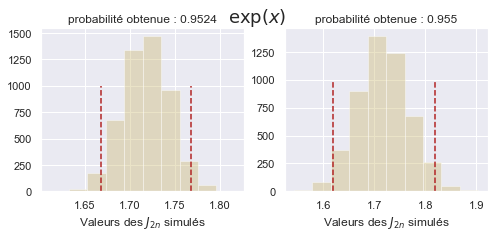

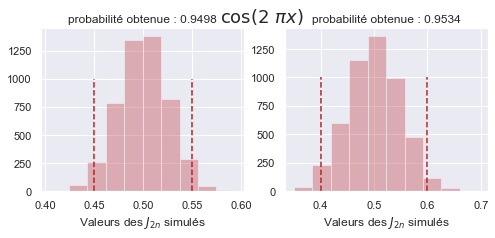

In [419]:
graph_intervalle_confiance(5000,f1,"b",r'$x^2$')
graph_intervalle_confiance(5000,f2,"y",r'$\mathrm{exp}(x)$')
graph_intervalle_confiance(5000,f3,"r",'  '+r'$\mathrm{cos}(2 \ \pi x)$')

Pour chaque graphique, on a d'abord construit l'intervalle de confiance qu'on avait obtenu à la partie théorique. On a ensuite 
simulé $N$ fois la variable $J_{2n}$. Cela nous a permis de construire un histogramme qui montre la répartition des valeurs obtenues. Les lignes rouges en pointillées montrent la borne inférieure et supérieure de l'intervalle sur la figure.
<br>
Le titre "probabilité obtenue" montre la proportion sur le N-échantillon de $J_{2n}$ des $J_{2n}$ qui sont dans l'intervalle de confiance. 
<br>
La relation (8.1) est vérifiée, on a quasi systématiquement une proba empirique $\geq 0.95 $

***

<br>
<div style="text-align:left"><span style=" font-family:Georgia; font-size:1.9em;"> <u> <bold> II - </bold> </u> <u><bold> Variables antithétiques </bold> </u> </span></div>
<br>

<div style="text-align:left"><span style=" font-family:Georgia; font-size:1.3em;"> <bold> 1. a ) Montrer que l'estimateur $ I_{2n} $ converge presque sûrement vers $I$. </bold>  </span></div>

$U \sim \mathcal{U}([0,1])$ donc $1-U \sim \mathcal{U}([0,1])$. Ainsi $f ( U )$ et $f ( 1 - U )$ sont de même loi et ont la même espérance.
\
Par conséquent $\mathbb{E}\big(\frac{1}{2}( f ( U ) + f ( 1 - U )) \big) = \frac{1}{2}\big(2\mathbb{E}( f ( U ) \big) = \mathbb{E}( f ( U ) ) = I $

$ \newcommand\myeq{\mathrel{\overset{en \ loi{\mbox{}}}{=}}}$
Les $(U_{i})_{i=1..n} \sim \mathcal{U}([0,1])$. On a donc, pour $f:[0,1] \to \mathbb{R} $ qui est <b> de carré intégrable </b> :
* les $(f(U_{i})+f(1-U_{i}))_{i>0} $ sont indépendants, de même loi
* les $(f(U_{i})+f(1-U_{i}))_{i>0} $ sont intégrables
<br>

Posons m = $\mathbb{E}(X_{1}) = \mathbb{E}\big(f(U_{1})+f(1-U_{1}). \big)$ Les conditions d'application de la <em> Loi Forte des Grands nombres  </em> sont réunies. On a donc :

<br>
$$ M_{n} = \frac{1}{n} \sum_{i=1}^{n} \big(f(U_{i})+f(1-U_{i}) \big) \underset{n \to +\infty}{\overset{p.s}{\longrightarrow}}  \mathbb{E}(X_{1})=m$$
<br>
En divisant par 2, et en utilisant la linéarité de l'espérance, on trouve alors :
<br>
$$ \frac{M_{n}}{2} = \frac{1}{2n} \sum_{i=1}^{n} \big(f(U_{i})+f(1-U_{i}) \big) \underset{n \to +\infty}{\overset{p.s}{\longrightarrow}}  \mathbb{E}\big(\frac{f(U_{1})}{2}+\frac{f(1-U_{1})}{2}. \big) = I $$

<div style="text-align:left"><span style=" font-family:Georgia; font-size:1.3em;"> <bold> 1. b ) Rappeler comment on peut obtenir une estimation de l'erreur $ \big| I_{2n} - I \big| $. </bold>  </span></div>

D'une part on a : 
<br>
$\begin{align}
\mathrm{E} \big[ ( I_{2n} - I ) ^{2} \big]
&= \mathrm{E} \big[I_{2n}^{2} \big] - 2 \mathrm{E} \big[I_{2n} I \big] + \mathrm{E} \big[I^{2} \big] \\
&= \mathrm{E} \big[I_{2n}^{2} \big] - 2I \mathrm{E} \big[I_{2n} \big] + I^{2} \\
&= (\frac{\sigma^{2}}{n}-\mathrm{E} \big[I_{2n}\big]^{2}) - 2I \mathrm{E} \big[I_{2n} \big] + I^{2} 
\end{align}
$ 
<br>



<div class="alert alert-block alert-info"> 
Or $ \mathrm{E}(I_{2n}) = I $ ,donc on a : 
$$ \mathrm{E} \big[ ( I_{2n} - I ) ^{2} \big] = \frac{\sigma^{2}}{n} $$ 
Lorsque la variance est finie (ce qui est le cas pour f de carré intégrable), on a une vitesse de converence de la méthode de Monte Carlo de $\mathrm{O}(n^{-\frac{1}{2}})$.

D'autre part, pour estimer l'erreur $ \big| I_{2n} - I \big|$, on peut aussi utiliser le théorème de Bienaymé-Tchebychev. $I_{2n}$ est d'espérance I (déjà démontré), et de variance finie $\sigma^{2}$, puisque f est de carré intégrable. Ainsi on a :
<br>
$$ \forall \alpha > 0,      \mathbb{P}(\big|I_{2n}-I \big| \geq \alpha) \leq \frac{\sigma^{2}}{\alpha^{2}}  $$
<br>
En pratique, on ne connaît pas $\sigma^{2}$, il est donc possible d'utiliser l'échantillon $\big( X_{1}, ... , X_{n} \big) $ pour obtenir un estimateur de $\sigma^{2}$ : $ \widehat{\sigma_{n-1}}^{2}$ 
<br>

<div style="text-align:left"><span style=" font-family:Georgia; font-size:1.3em;"> <bold> 2. Montrer que $ \mathrm{Var} \big( I_{2n} \big) \leq \mathrm{Var}\big(J_{2n} \big) $ </bold>  </span></div>

Soit $ n \in \mathbf{N}$ Les $(U_{i})_{i=1...n}$ étant indépendants, les $(f(U_{i}))_{i=1...n}$ le sont aussi, donc on a :
<br>
$ 
\begin{align}
\mathrm{Var}\big(J_{2n} \big) 
&= \frac{1}{4n^{2}} \  \mathrm{Var} \big( \sum_{i=1}^{2n}   f(U_{i}) \big) \\
&= \frac{1}{4n^{2}} \  \big( \sum_{i=1}^{2n}  \mathrm{Var} ( f(U_{i}) \big) \\
&= \underbrace{\frac{1}{4n^{2}} \ \big(2n \mathrm{Var}{f(U_{1})}\big)}_{car \space les \space f(U_{i})_{i=1...n} \space sont \space de \space même \space loi} \\
&= \frac{1}{2n} \ \mathrm{Var}{f(U_{1})}
\end{align}
$
<br>
<br>

$ 
\begin{align}
\mathrm{Var}\big(I_{2n} \big) 
&= \frac{1}{4n^{2}} \ \mathrm{Var} \big( \sum_{i=1}^{n}  f(U_{i}) +f(1-U_{i}) \big) \\
&= \frac{1}{4n^{2}} \ \Big( \big( \sum_{i=1}^{n}  \mathrm{Var}{f(U_{i})} + \mathrm{Var}{f(1-U_{i})} \big) + 2 \big( \sum_{i=1}^{n} \sum_{j>i}^{n}    \mathrm{Cov} \big[ {f(U_{i}), f(1-U_{j}}) \big]  \big) \Big)
  \\ 
 &= \frac{1}{4n^{2}} \ \Big( n \big(\mathrm{Var}{f(U_{1})} + \mathrm{Var}{f(1-U_{1})} \big) + n(n-1)
 \mathrm{Cov} \big[ {f(U_{1}), f(1-U_{1}})  \big] \Big)
 \\ 
\end{align}
$
<br>
<br>
$ \newcommand\myeq{\mathrel{\overset{en \ loi{\mbox{}}}{=}}}$

On remarque ici que $ \mathrm{Var}({f(1-U_{1})}) = \mathrm{Var}({f(U_{1}})) $, car  $ U_{1} \myeq 1-U_{1} $. Donc : 
<br>
<br>
$ 
\begin{align}
\mathrm{Var}\big(I_{2n} \big)
&= \frac{1}{4n^{2}} \Big( 2n \mathrm{Var}{f(U_{1})} + n(n-1)
 \mathrm{Cov} \big[ {f(U_{1}), f(1-U_{1}})  \big] \Big) \\
&= \mathrm{Var}({J_{2n}})+ n(n-1) \mathrm{Cov} \big[ {f(U_{1}), f(1-U_{1}})  \big] 
\end{align}
$
<br>
<br>

<div class="alert alert-block alert-info"> 
Ainsi :
<br>
$
\begin{align}
&&
\space\mathrm{Var}\big(I_{2n} \big) \leq \mathrm{Var}\big(J_{2n}\big) 
\\ 
\iff&& \mathrm{Var}\big(I_{2n} \big) - \mathrm{Var}\big(J_{2n} \big) \leq 0 
\\
\iff&& n(n-1) \ \mathrm{Cov} \big[ {f(U_{1}), f(1-U_{1}}) \big] \leq 0
\\
\iff&& \mathrm{Cov} \big[ {f(U_{1}), f(1-U_{1}}) \big] \leq 0
\end{align}
$

<em> <u> P.S : </u> $\space$ $\space$ La dernière équivalence étant vraie, car on considère n > 1, le cas n=1 étant trivial </em>

<div style="text-align:left"><span style=" font-family:Georgia; font-size:1.3em;"> <bold> 3. a) $\space $ On suppose que f est monotone. Montrer que : $$\mathrm{E} \Big[ \big( f(U_{1})-f(U_{2}) \big) \big( f(1-U_{1})-f(1-U_{2}) \big) \Big] \leq 0$$ </bold>  </span></div>


On peut choisir $f$ croissante, quitte à prendre $-f$ pour se ramener au cas d'une fonction décroissante.
<br>
On a alors :
<br>
$
\begin{align}
\mathrm{E} \Big[ \big( f(U_{1})-f(U_{2}) \big) \big( f(1-U_{1})-f(1-U_{2}) \big) \Big] 
&= \int_{0}^{1} \int_{0}^{1} \Big( \big( \ f(x)-f(y) \ \big) \ \big( (f(1-x) - \ f(1-y) \big) \ dx \ dy \\
&= \int_{0}^{1} \Big( \int_{0}^{y} \Big( \big( \ f(x)-f(y) \ \big) \ \big( (f(1-x) - \ f(1-y) \big) \ dx \Big) + \Big( \int_{y}^{1} \Big( \big( \ f(x)-f(y) \ \big) \ \big( (f(1-x) - \ f(1-y) \big) \ dx \Big) \ dy \\
\end{align}
$
On a alors, pour $y \in [0,1] $ fixé : 
<br>
- sur $[0,y]$ : $ \ $  $ f(x) - f(y) \leq 0 $ et $ f(1-x) - f(1-y) \geq 0 $ par croissance de $f$, donc le produit des deux termes est négatif ou nul sur l'intervalle
- sur $[y,1]$ : $ \ $  $ f(x) - f(y) \geq 0 $ et $ f(1-x) - f(1-y) \leq 0 $ par croissance de $f$, donc le produit des deux termes est négatif ou nul sur l'intervalle
<br>
<br>
Par croissance de l'intégrale, on a $\forall y \in [0,1] $ :
<br>
- $\int_{0}^{y} \big( \ f(x)-f(y) \ \big) \ \big( (f(1-x) - \ f(1-y) \big) \ dx  \leq 0 $
<br>
- $\int_{y}^{1}  \big( \ f(x)-f(y) \ \big) \ \big( (f(1-x) - \ f(1-y) \big) \ dx \leq 0 $
- Ainsi de manière évidente $\int_{0}^{y}  \big( \ f(x)-f(y) \ \big) \ \big( (f(1-x) - \ f(1-y) \big) \ dx +\int_{y}^{1}  \big( \ f(x)-f(y) \ \big) \ \big( (f(1-x) - \ f(1-y) \big) \ dx \leq 0 $

<div class="alert alert-block alert-info"> 
En utilisant encore une fois la croissance de l'intégrale on a en intégrant par rapport à y :
<br>
$
\\
\begin{align}
\mathrm{E} \Big[ \big( f(U_{1})-f(U_{2}) \big) \big( f(1-U_{1})-f(1-U_{2}) \big) \Big] 
&= \int_{0}^{1} \Big( \int_{0}^{y} \Big( \big( \ f(x)-f(y) \ \big) \ \big( (f(1-x) - \ f(1-y) \big) \ dx \Big) \\ &+ \Big( \int_{y}^{1} \Big( \big( \ f(x)-f(y) \ \big) \ \big( (f(1-x) - \ f(1-y) \big) \ dx \Big) \ dy \\
&\leq 0
\end{align}
$

<div style="text-align:left"><span style=" font-family:Georgia; font-size:1.3em;"> <bold> 3. b) $\space $ En déduire que dans ce cas, on a bien : $$ \mathrm{Cov} \space \big( f(U) \space , f(1-U) \big) \space \leq 0 $$ </bold>  </span></div>


On développe l'espérance de la question précédente :
$$
\begin{align}
\mathrm{E} \Big[ \big( f(U_{1})-f(U_{2}) \big) \big( f(1-U_{1})-f(1-U_{2}) \big) \Big] = \mathrm{E} \Big[ \big( f(U_{1}) \space f(1-U_{1}) \big] \space + \space \mathrm{E} \Big[ \big( f(U_{2}) \space f(1-U_{2}) \big] - \mathrm{E} \Big[ \big( f(U_{1}) \space f(1-U_{2}) \big] - \mathrm{E} \Big[ \big( f(U_{2}) \space f(1-U_{1}) \big]
\end{align}$$
<br>
Pour conclure, on utilise encore l'égalité en loi : 
$ \newcommand\myeq{\mathrel{\overset{en \ loi{\mbox{}}}{=}}}$
$ U_{1} \myeq 1-U_{1} $, donc $ f(U_{1}) \myeq f(1-U_{1}) $ et on réarrange alors l'égalité précédente, en utilisant l'indépendance de $U_{1}$ et $U_{2}$, ce qui donne par composition par $ f $ continue, l'indépendance de $f(U_{1})$ avec $f(1-U_{2})$ et $f(U_{2})$, celle de $f(1-U_{1})$ avec $f(U_{2})$ et $f(1-U_{2})$, etc. :
<br>
<br>
$$
\mathrm{E} \Big[ f(U_{1}) \space f(1-U_{1}) \big] \space + \space \mathrm{E} \Big[  f(U_{2}) \space f(1-U_{2}) \big] - \mathrm{E} \Big[  f(U_{1}) \space f(1-U_{2}) \big] - \mathrm{E} \Big[ \big( f(U_{2}) \space f(1-U_{1}) \big]
$$
$$
\newcommand\myeq{\mathrel{\overset{par \ indépendance {\mbox{}}}{=}}}
\myeq \space \mathrm{E} \Big[  f(U_{1}) \space f(1-U_{1}) \big] \space + \space \mathrm{E} \Big[  f(U_{2}) \space f(1-U_{2}) \big] - \mathrm{E}[ f(U_{1})] \space \mathrm{E}[f(1-U_{2})] - \mathrm{E}[f(U_{2})] \space \mathrm{E}[f(1-U_{1})]
$$
$$
\newcommand\myeq{\mathrel{\overset{en \ utilisant \ l'égalité \ en \ loi{\mbox{}}}{=}}}
\myeq \space 2 \ \mathrm{E}\Big[ f(U_{1}) \space f(1-U_{1}) \big]  - 2 \ \mathrm{E}[ f(U_{1})] \ \mathrm{E}[ f(1-U_{1}) ] 
= 2 \ \mathrm{Cov}\big(f(U_{1}),f(1-U_{1})\big)
$$
<br>
Pour l'avant-dernière inégalité, on a utilisé, comme écrit, l'égalité en loi, qui nous a donné les égalités suivantes :
<br>
* $\mathrm{E}(f(U_{2})  =  \mathrm{E}(f(U_{1}) $
* $\mathrm{E}(f(1-U_{2})) =  \mathrm{E}(f(1-U_{1}))$ 
* $\mathrm{E}\big( (f(1-(U_{2}) f(U_{2}) \big) \ = \ \mathrm{E}\big((f(1-(U_{1}) f(U_{1}) \big)$
<br>

<div class="alert alert-block alert-info"> Pour conclure, on utilise l'égalité qu'on vient de démontrer, ce qui donne : 
<br>
$\mathrm{E} \Big[ \big( f(U_{1})-f(U_{2}) \big) \big( f(1-U_{1})-f(1-U_{2}) \big) \Big] \leq 0 $ :
<br>
$ \iff 2 \ \mathrm{Cov}\big(f(U_{1}),f(1-U_{1})\big) \leq 0 $
<br>
$ \iff \mathrm{Cov}\big(f(U),f(1-U)\big) \leq 0 $

<div style="text-align:left"><span style=" font-family:Georgia; font-size:1.3em;"> <bold> 3. c) $\space $ Conclure quant à l'intérêt de cette méthode </bold>  </span></div>

<div class="alert alert-block alert-info"> La question précédente montre que dans le cas d'une fonction monotone, on a 
 $ \mathrm{Cov}\big(f(U),f(1-U)\big) \leq 0 $. 
<br> 
Or on a aussi montré à la Q.2 que $ \mathrm{Cov}\big(f(U),f(1-U)\big) \leq 0 \iff \mathrm{Var} \big( I_{2n} \big) \leq \mathrm{Var}\big(J_{2n} \big) $ 
<br>
Ainsi, dans les cas où f est monotone, les estimateurs $I_{2n}$ et $J_{2n}$ sont tous les deux sans biais, mais le RQM de $I_{2n}$ est inférieure à celui de $J_{2n}$, et on peut donc s'attendre à ce que cet estimateur soit meilleur que $J_{2n}$

***

## 4. $\space $ Comparer les estimateurs $J_{2n}$ et $I_{2n}$ à n fixe </bold>  </span></div>

On peut s'attendre à ce que les résultats soient meilleurs pour les fonctions monotones ($x^{2}$ et $\mathrm{exp}(x)$) et à l'inverse que l'estmateur soit moins bon pour $\mathrm{cos}(2 \pi x)$. Voyons ce qu'il en est ...

###  Définition des fonctions de base : 

In [374]:
def IT(n,f):
    X=npr.rand(1,n)
    return 1/(2*n)*np.sum(f(X)+f(1-X))

#Fonctionnement identique à J, appliqué à I
def Moyenne_variables_antithétiques(N,n,f):
    M=0
    for i in range(N):
        M=M+IT(n,f)
    return M/N

### Comparaison des estimateurs à n fixe. n=10,30,50 : comparaison des valeurs obtenues, pour N variables simulées

In [375]:
print("\033[1m" + "~~ Comparaison de la méthode de Monte-Carlo et de la Méthode des variables antithétiques pour n=10,30,50 ~~" "\033[0m")
print("")

Fonctions=['x^2','exp(x)','cos(2 pi x)^2']
i=0

for f in [f1,f2,f3]:
    print("\033[1m" 'Pour la fonction f(x)= '+Fonctions[i] + "\033[0m")
    I=integrate.quad(lambda x: f(x),0,1)[0]
    print("La valeur de l'intégrale entre 0 et 1 est :  " + f"{I:.6}")
    print("")
    for n in [10,30,50]:
        print("Pour n = "+str(n)+" on a :")
        MC=Moyenne_MonteCarlo(N,n,f)
        MVA=Moyenne_variables_antithétiques(N,n,f)
        print("La méthode de Monte-Carlo donne en moyenne, sur "+str(N)+ " essais de "+str(n)+" échantillons :   "+ f"{MC:.5}")
        print("Erreur de Monte-Carlo:"+ f"{np.abs(I-MC):.6}")
        print("La méthode des variables antithétiques donne en moyenne, sur "+str(N)+ " essais de "+str(n)+" échantillons :   "+ f"{MVA:.5}")
        print("Erreur des variables antithétiques :"+ f"{np.abs(I-MVA):.6}")
        print("Meilleure méthode : variables anthithétiques" if(np.abs(I-MVA)<np.abs(I-MC)) else "Meilleure méthode : Méthode de Monte-carlo classique")
        print("")
    i=i+1

~~ Comparaison de la méthode de Monte-Carlo et de la Méthode des variables antithétiques pour n=10,30,50 ~~

Pour la fonction f(x)= x^2
La valeur de l'intégrale entre 0 et 1 est :  0.333333

Pour n = 10 on a :
La méthode de Monte-Carlo donne en moyenne, sur 10000 essais de 10 échantillons :   0.33324
Erreur de Monte-Carlo:9.57535e-05
La méthode des variables antithétiques donne en moyenne, sur 10000 essais de 10 échantillons :   0.33362
Erreur des variables antithétiques :0.000291616
Meilleure méthode : Méthode de Monte-carlo classique

Pour n = 30 on a :
La méthode de Monte-Carlo donne en moyenne, sur 10000 essais de 30 échantillons :   0.33385
Erreur de Monte-Carlo:0.000512489
La méthode des variables antithétiques donne en moyenne, sur 10000 essais de 30 échantillons :   0.33331
Erreur des variables antithétiques :2.5093e-05
Meilleure méthode : variables anthithétiques

Pour n = 50 on a :
La méthode de Monte-Carlo donne en moyenne, sur 10000 essais de 50 échantillons :   0.33361
Err

Pour les cas n=10,30,50, on voit que dans le cas de f1, f2, fonctions monotones, l'estimateur via la méthode des variables antithétiques est meilleur que celui de Monte-Carlo classique. Néanmoins, pour f3, on constate qu'aucun des deux estimateurs n'est réellement plus intéressant que l'autre. On a confirmé notre intuition : la méthode des variables antithétiques réduit la variance dans le cas (1) et (2), lorsque la fonction est monotone
<br>


### Comparaison des estimateurs à n fixe. n=10,30,50 : comparaison des variances empiriques pour N variables simulées

In [376]:
def I_var_empirique(f):
    #Calcul de l'espérance
    E=integrate.quad(lambda x: f(x),0,1)[0]
    U=npr.rand(1,n)
    X=(f(U)+f(1-U))/2
    return 1/(n-1)*np.sum(X-E)**2

def J_var_empirique(f):
    #Calcul de l'espérance
    E=integrate.quad(lambda x: f(x),0,1)[0]
    U=npr.rand(1,2*n)
    X=f(U)
    return 1/(2*n-1)*np.sum(X-E)**2

def plot_var(f,nom_de_la_fonction,n):
    Simulation_de_I_de_taille_N=[]
    Simulation_de_J_de_taille_N=[]
    for i in range(N):
        Simulation_de_I_de_taille_N.append(I_var_empirique(f))
        Simulation_de_J_de_taille_N.append(J_var_empirique(f))
    fig = PLT.figure(num=0,figsize=(8,3))
    fig.suptitle('Distribution empirique de la variance pour '+ nom_de_la_fonction +' pour les estimateurs In et Jn (n='+str(n)+' , N='+str(N)+')', fontsize=14)
    plt.subplot(1,2,1)
    sns.distplot(Simulation_de_I_de_taille_N, color='orange',label='variance de I_'+str(n),kde=True)
    plt.legend()
    plt.subplot(1,2,2)
    sns.distplot(Simulation_de_J_de_taille_N, color='green',label='variance de J_'+str(n),kde=True)
    plt.legend()
    plt.show()

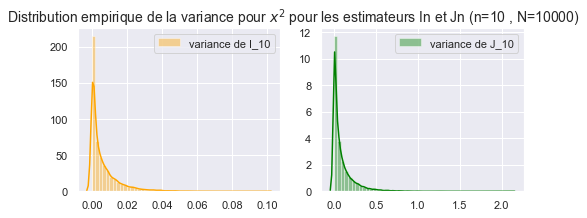

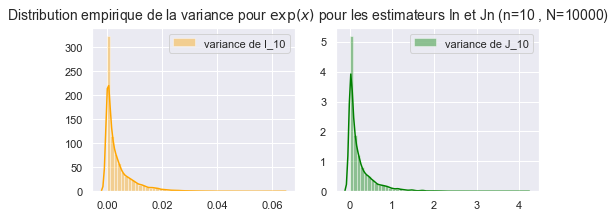

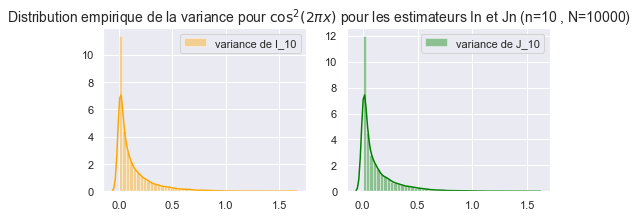

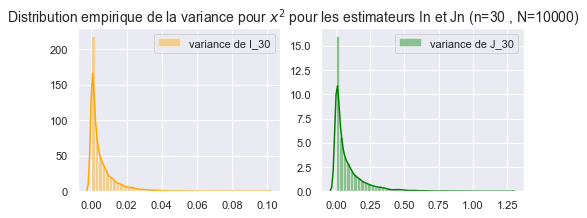

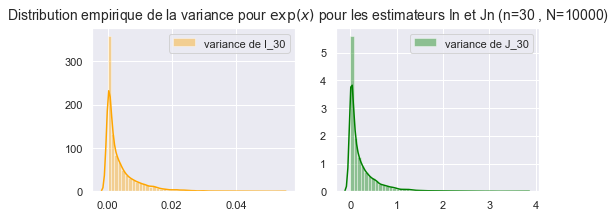

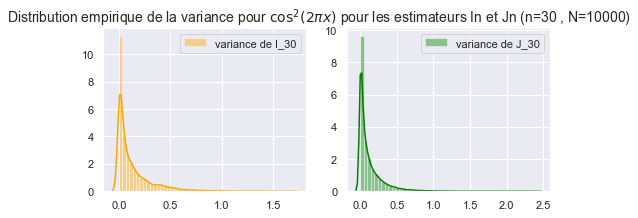

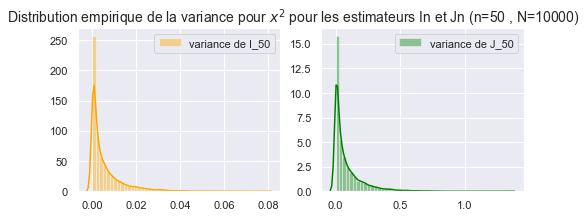

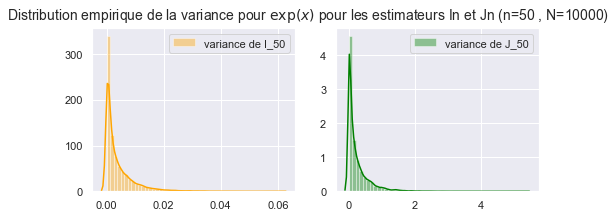

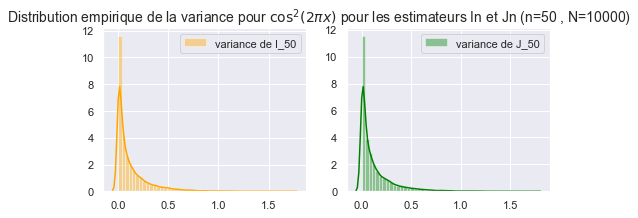

In [377]:
for n in [10,30,50]:
    plot_var(f1,r'$x^{2}$',n)
    plot_var(f2,r'$\mathrm{exp}(x)$',n)
    plot_var(f3,r'$\cos^{2} (2 \pi x)$',n)

Ces résultats sont déjà éloquents : 
* pour les deux premiers cas, c'est à dire les fonctions monotones, la distribution de la variance montre une variance généralement bien plus basse : le mode de la variance empirique est jusqu'à 10 fois plus bas selon les cas, ce qui fait de $I_{2n}$ un estimateur plus intéressant. Notons que dans tous les cas la dispersion de la variance empirique est beaucoup plus ressérée dans le cas de $I_{2n}$
* pour le denier cas, c'est plus mitigé, il n'y a un estimateur qui paraît réellement meilleur que l'autre

***

<br>
<div style="text-align:left"><span style=" font-family:Georgia; font-size:1.9em;"> <u> <bold> III - </bold> </u> <u><bold> Echantillonage d'importance </bold> </u> </span></div>
<br>

$
\begin{align}
\mathbb{E}\big(S_{n} \big) 
&= \frac{1}{n} n \mathbb{E}\big( \big(\frac{f}{q}\big)(Y_{1}) \big) \\
&= \int_{0}^{1} \big(\frac{f(x)}{q(x)}\big)q(x) \ dx \\ 
 &= I
\end{align}
$
<div class="alert alert-block alert-info"> $\mathbb{E}\big(S_{n} \big) = I$

$
\begin{align}
\mathrm{Var}\big(S_{n} \big) 
&= \frac{1}{n}\mathrm{Var}\Big(\big(\frac{f}{q}\big)Y_{1} \Big)  \\
&= \mathbb{E}\big( \big(\frac{f}{q}\big)^2(Y_{1})\big) - I^2 \\
&= \frac{1}{n}\Big(\int_{0}^{1} \big(\frac{f(x)}{q(x)}\big)^2q(x) \ dx - I^2\Big) \\ 
 &= \frac{v_{1}(q)}{n}
\end{align}
$
<div class="alert alert-block alert-info"> $\mathrm{Var}\big(S_{n} \big) ) = \frac{v_{1}(q)}{n}$

Les $\Big(\big(\frac{f}{q}\big)Y_{i}\Big)_{i≥1}$ sont indépendantes, de même loi et de carré intégrable avec $\mathbb{E}\big(\big(\frac{f}{q}\big)Y_{i} \big) = I$ et $\mathrm{Var}\big(\big(\frac{f}{q}\big)Y_{i} \big) = v_{1}(q)$ donc d'après le théorème central limite on a : 
$$ \sqrt{n}\frac{(S_{n}-I)}{\sqrt{v_{1}(q)}}\underset{n \to +\infty}{\overset{\mathcal{L}}{\longrightarrow}}{\cal N}(0,1)$$ <br>
D'où : 
$$
\begin{align}
\mathbb{P}\Big(\big|\sqrt{n}\frac{(S_{n}-I)}{\sqrt{v_{1}(q)}}\big|≤1,96\Big)=0,95 \\
\mathbb{P}\Big(\big|(I-S_{n})\big|≤\frac{1,96\sqrt{v_{1}(q)}}{\sqrt{n}}\Big)=0,95 \\
\mathbb{P}\Big(I\in\Big[S_{n}-\frac{1,96\sqrt{v_{1}(q)}}{\sqrt{n}};S_{n}+\frac{1,96\sqrt{v_{1}(q)}}{\sqrt{n}}\Big]\Big)=0,95
\end{align}
$$
<div class="alert alert-block alert-info">Ainsi $\Big[S_{n}-\frac{1,96\sqrt{v_{1}(q)}}{\sqrt{n}};S_{n}+\frac{1,96\sqrt{v_{1}(q)}}{\sqrt{n}}\Big]$ est un intervalle de confiance asymptotique à 95% approchant $I$.

On cherche à minimiser $\mathrm{Var}\big(S_{n} \big) $ ce qui revient à minimiser $v_{1}(q)$ ou encore $\int_{0}^{1} \frac{f(x)^2}{q_{\lambda}(x)} \ dx$.

Pour $f(x) = x^2$, on a :
$$
\int_{0}^{1} \frac{f(x)^2}{q(x)} \ dx = \frac { e ^ { \lambda } - 1 } { \lambda } \int _ { 0 } ^ { 1 } \frac { x ^ { 4 } } { e ^ { \lambda x } - 1 } d x
$$

On peut trouver le lambda optimal de façon numérique : 

La valeur de lambda qui minimse v1(q) est :
3.444738012547924


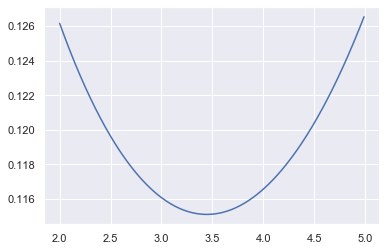

In [378]:
from scipy.integrate import quad
from scipy.optimize import minimize

def f(l):
    res, err = quad(lambda x: (x**4)/(np.exp(l*x)), 0, 1) 
    return res*(np.exp(l)-1)/l

lambda1=minimize(f,1).x[0]

print('La valeur de lambda qui minimse v1(q) est :')
print(lambda1)

X=[]
for l in np.arange(2,5,0.01):
    X.append(f(l))
plt.plot(np.arange(2,5,0.01),X)

Empiriquement on trouve un lamda optimal qui vaut $\lambda ≈ 3.44$. 

Pour $f(x) = \exp (x)-1 $, on a :
$$
\int_{0}^{1} \frac{f(x)^2}{q(x)} \ dx = \frac { e ^ { \lambda } - 1 } { \lambda } \int _ { 0 } ^ { 1 } \frac { (e^x-1)^2 } { e ^ { \lambda x } - 1 } d x
$$

On peut trouver le lambda optimal de façon numérique : 

La valeur de lambda qui minimse v1(q) est :
1.0


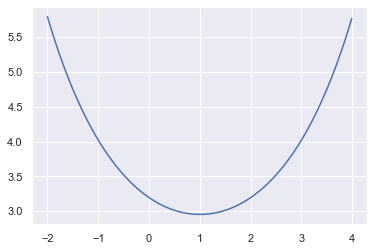

In [379]:
def g(l):
    res, err = quad(lambda x: ((np.exp(x))**2)/(np.exp(l*x)), 0, 1) 
    return res*(np.exp(l)-1)/l

minimize(g,1).x[0]

lambda2=minimize(g,1).x[0]
print('La valeur de lambda qui minimse v1(q) est :')
print(lambda2)

X=[]
for l in np.arange(-2,4,0.01):
    X.append(g(l))
plt.plot(np.arange(-2,4,0.01),X)

Empiriquement on trouve un lamda optimal qui vaut $\lambda ≈ 1.0$. 

Pour simuler les $\big(Y_{i}\big)_{i≥1}$ on simule des variables aléatoire uniforme sur $[0,1]$ puis on applique $F^{-1}_{\lambda}$ l'inverse de la fonction de répartition associé à $q_{\lambda}$. <br>
On a : <br>
$$
\begin{align}
\forall x \in [0,1], F_{\lambda}(x)
&= \int_{0}^{x}q_{\lambda}(t)dt \\
&= \int_{0}^{x}\lambda \frac{\exp(\lambda t)}{\exp(\lambda)-1}dt \\
&= \frac{\lambda}{\exp(\lambda)-1}\Big[\frac{\exp(\lambda t)}{\lambda}\Big]^{x}_{0}  \\
&= \frac{\exp(\lambda x)-1}{\exp(\lambda)-1} \\
\end{align}
$$
D'où :

<div class="alert alert-block alert-info">
$$
\forall x \in [0,1], F^{-1}_{\lambda}(x) = \frac{\ln\big((\exp(\lambda)-1)x+1\big)}{\lambda}
$$

## (S) Simulation de $ S_{n} $ pour $ n=10,30,50 $

### Fonctions de base

In [420]:
def Q(l,x):
    return np.log((np.exp(l)-1)*x+1)/l

def q(l,x):
    return l*(np.exp(l*x))/(np.exp(l)-1)

In [421]:
## CREER FONCTIONS QUI DETERMINE L EN FOCNTION DE F ET IMPLANTER DANS S(N,F,L) pour que ça deveienne une fonction juste de n et f

def S(n,f,l):
    S=0
    for i in range(n):
        Y=Q(l,np.random.random())
        S=S+f(Y)/q(l,Y)
    return 1/n*S

def réalisation_S(n,f,l):
    S=0
    X=[]
    for i in range(n):
        t=Q(l,np.random.rand())
        S+=f(t)/q(l,t)
        X.append(S/(i+1))
    return X

## Fonctions "graph/plot"

In [422]:
#Fonction qui représente l'évolution de 0 à n des simulations de MC
%matplotlib inline
import matplotlib.pyplot as plt

def plotS(f,n,l,nom_fonction):
    X = réalisation_S(n,f,l)
    r = np.random.random()
    b = np.random.random()
    g = np.random.random()
    color = (r, g, b)
    a=integrate.quad(lambda x: f(x),0,1)[0]
    plt.hlines(a,0,n,'indianred','dotted')
    plt.plot(X,c=color)
    plt.xlabel("Taille de l'échantillon (n)")
    plt.title("Simulation de l'esimateur "+r'$ S_{n} $'+" par la méthode d'Echantillonage d'importance pour n = "+str(n)+" pour f(x)="+nom_fonction)
    plt.show() # affiche dans le notebook

## Résultats à n=10,30,50

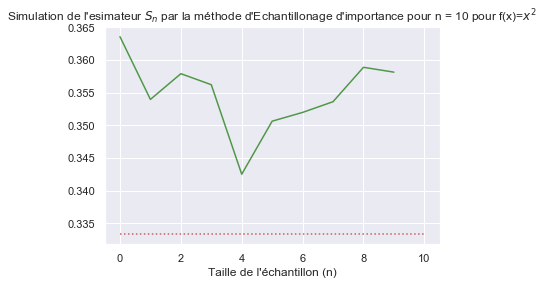

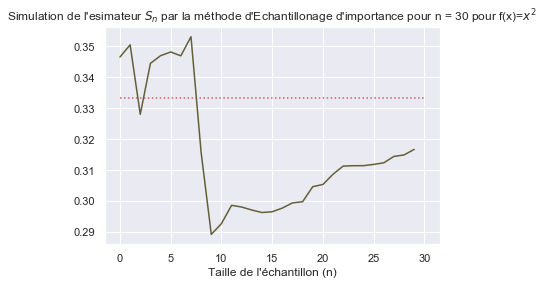

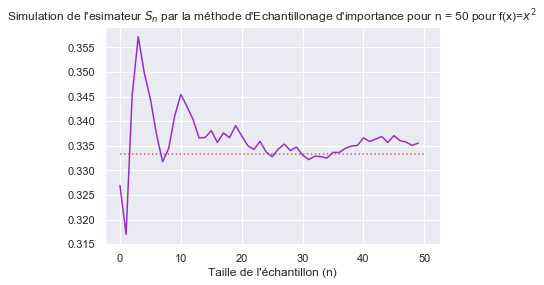

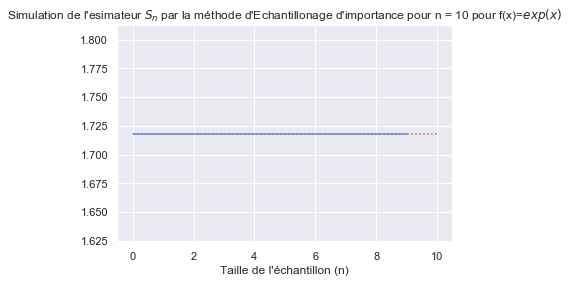

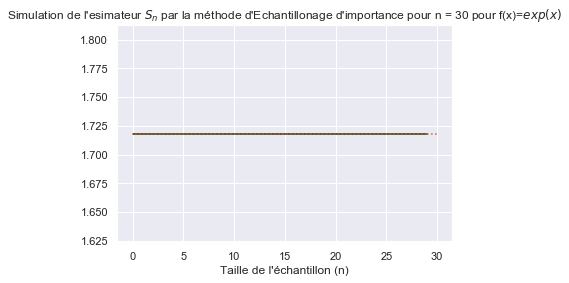

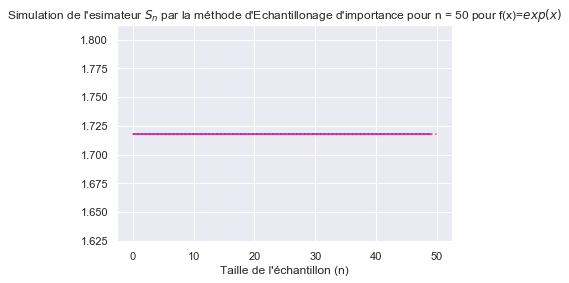

In [423]:
nom_fonction=r'$ x^{2} $'
f=f1
l=lambda1
for n in [10,30,50]:
    plotS(f,n,lambda1,nom_fonction)

nom_fonction=r'$ exp(x) $'
f=f2
l=lambda2
for n in [10,30,50]:
    plotS(f,n,lambda2,nom_fonction)

## Comparaison des Estimateurs 

### Définition des fonctions var_empiriques

In [424]:
#On construit les variances empiriques comme indiqué

Liste_fonctions=[f1,f2]

def var_empirique_I(n,f,M):
    S1=0
    S2=0
    for i in range(M):
        A=IT(n,f)
        S1+=A**2
        S2+=A
    return  S1/M-(S2/M)**2

def var_empirique_S(n,f,l,M):
    S1=0
    S2=0
    for i in range(M):
        A=S(n,f,l)
        S1+=A**2
        S2+=A
    return  S1/M-(S2/M)**2

### Simulation 

In [425]:
M=200
n=50
f=f1
l=lambda1
print(var_empirique_I(2*n,f,M))
print(var_empirique_S(2*n,f,l,M))
f=f2
l=lambda2
print(var_empirique_I(2*n,f,M))
print(var_empirique_S(2*n,f,l,M))

6.233473433361891e-05
4.2228665210516936e-05
3.822992455404517e-05
-1.4654943925052066e-14


L'estimateur $ S_{2n} $ a une variance empirique $ I_{2n} $ plus faible sur un grand nombre d'estiamtion, il semble donc le meilleur. Par ailleurs, on remarque que dans le cas de la fonction exponentielle la variance empirique de $S_{2n}$ est extrêmemnt faible : en effet, pour $\lambda=1$ on retrouve la densité parfaite pour la méthode de Monte Carlo comme on l'a vu dans le cours. 

<br>
<div style="text-align:left"><span style=" font-family:Georgia; font-size:1.9em;"> <u> <bold> IV - </bold> </u> <u><bold> Variables de contrôle </bold> </u> </span></div>
<br>



<div style="text-align:left"> <font size=4> 1.a) Quel est le comportement de $K^{\alpha}_{n}$ dans la limite $n \longrightarrow \infty$  ? </bold>  </span></div> 

Pour démontrer la convergence de $K^{\alpha}_{n}$ en $\infty$, on va utiliser la <em> Loi Forte des Grands Nombres</em> sur les variables $\big( \space f(U_{i}) - \alpha \space Y_{i} \space \big)_{i \geq 1}$ Rappelons les hypothèses qu'on utilise :
- les réalisations $\big( U_{i},Y_{i} \big)_{ii \geq 1} $ sont indépendantes, donc, $f$ étant continue, les $\big( \space f(U_{i}) - \alpha \space Y_{i} \space \big)_{i \geq 1} $ sont i.i.d
- $f$ est de carré intégrable, donc $f(U)$ est intégrable, et Y aussi : ainsi $f(U) - \alpha Y$ est intégrable (d'espérance nulle), et d'éspérance égale à : 
<br>
<br>
$$\mathrm{E}(f(U)- \alpha Y) = \mathrm{E}(f(U))-\alpha \mathrm{E}(Y) = \mathrm{E}(f(U)) = I $$
<br>

La <em> Loi Forte des Grands nombres </em> permet donc d'affirmer : 
$$ K^{\alpha}_{n} = \frac{1}{n} \sum_{i=1}^{n} \big( \space f(U_{i}) - \alpha \space Y_{i} \space \big) \space \overset{ps}{\longrightarrow} \space \space  \mathrm{E}(f(U)- \alpha Y) = I $$

<div style="text-align:left"> <font size=4>  <bold> 1.b) Espérance et variance de $K^{\alpha}_{n}$ ? </bold>  </span></div> 

On a déjà trouvé l'espérance de $K_n^{\alpha}$. Redémontrons là tout de même :
- $K_n^{\alpha} \in \mathrm{L}^{1} $ en tant que somme de variables aléatoires elles-mêmes intégrables
- par linéarité de l'espérance, on a $\mathrm{E}(K_n^{\alpha}) = \frac{1}{n} \sum_{i=1}^n \mathrm{E} \big( f(U_i)-\alpha Y_{i} \big) = \frac{1}{n} \space n \mathrm{E} \big( f(U) - \alpha Y \big) = \mathrm{E}(f(U)) = I $, car l'espérance de Y est nulle

Intéressons nous désormais à la variance de $K_n^{\alpha}$ :
- $K_n^{\alpha}$ admet une variance en tant que somme de variables de carré intégrable i.i.d
- Les $(f(U_i)- \alpha Y_{i})_{i \geq 1}$ étant i.i.d, on a donc  $ \mathrm{V}  \big( K_n^{\alpha} \big) = \frac{1}{n^2} \sum_{i=1}^n \mathrm{V} \big( f(U_i)- \alpha Y_{i} \big) = \frac{1}{n^2} * n \big( \mathrm{V} (f(U)) + \alpha^2 \mathrm{V}(Y) + 2 \space \alpha \space \mathrm{cov}(f(U),Y) \big) $. 
<br>
<div class="alert alert-block alert-info"> 
Ainsi on a :
$$ \mathrm{E} \big( f(U) - \alpha Y \big) = \mathrm{E}(f(U)) = I $$
$$ \mathrm{V}  \big( K_n^{\alpha} \big) = \frac{1}{n} \Big[ \mathrm{V} (f(U)) + \alpha^2 \mathrm{V}(Y) + 2 \space \alpha \space \mathrm{cov}(f(U),Y) \Big] $$


<div style="text-align:left"> <font size=4>  <bold> 1.c) Minimum  de $ \mathrm{V}(K^{\alpha}_{n})$ ? </bold>  </span></div> 

- <u> Premier cas :</u>    $ \space \mathrm{V}(Y) = 0 $ : 
<br>
 alors, sans redémontrer, on utilise $\mathrm{V}(Y) = 0 \iff Y $ est constante p.s. 
<br> 
Or $ \mathrm{E}(Y) = 0 $ , donc $ Y = 0 $ p.s. Donc $ \mathrm{V}  \big( K_n^{\alpha} \big) = \frac{1}{n} \mathrm{V} (f(U)) $, ne dépend donc pas de $\alpha$
<br>
<br>
- <u> Second cas :</u> $  \space   \mathrm{V}(Y) \ne 0 $ : 
<br>
Alors $ \mathrm{V}  \big( K_n^{\alpha} \big) $ est un polynôme de degré 2 en $\alpha$. Comme son coefficient dominant ( $ \mathrm{V}(Y) $ ) est strictement positif ( car $ \mathrm{V}(Y) \ne 0 $  ), alors le $ \mathrm{V}  \big( K_n^{\alpha} \big) $ atteint son minimum en : 
<br>
<div class="alert alert-block alert-info"> 
$$  \alpha^{*} = \frac{b}{2a} = \frac{2 \space n \space \mathrm{cov}( f(U) \space , Y) } { 2 \space n \space V(Y) }  = \frac{\mathrm{cov}(f(U) \space ,Y)}{V(Y)} $$

<div style="text-align:left"> <font size=4>  <bold> 2. Pour $ Y = U - 1/2 $, et les fonctions $ f(x) \space = \space x^{2} , \exp(x) \space $    pour  $\alpha^{*}$ et construire l'estimateur $\mathrm{K}_{n}^{\alpha *}$  </bold>  </span></div> 

$$
\begin{align}
\alpha^* 
&= \frac{\mathrm{Cov}(f(U),Y)}{\mathrm{Var}(Y)} \\
&= \frac{\mathbb{E}(f(U)Y)-\mathbb{E}(f(U)\mathbb{E}(Y))}{\mathrm{Var}(U)} \\
&= 12 \mathbb{E}(f(U)Y)
\end{align}
$$
car $\mathbb{E}(Y) = 0$ et $\mathrm{Var}(U) = 12$

Pour $f(x)=x^2$, on a : 
$$
\begin{align}
\alpha^* 
&= 12\mathbb{E}(U^3)-6\mathbb{E}(U^2) \\
&= 12\int_{0}^{1}x^3dx - 6\int_{0}^{1}x^2dx\\
&= \frac{12}{4}-\frac{6}{3} \\
&= 1
\end{align}
$$

Pour $f(x)=e^x$, on a : 
$$
\begin{align}
\alpha^* 
&= 12\mathbb{E}(\exp(U)(U-\frac{1}{2})) \\
&= 12\big(\mathbb{E}(U\exp(U))-\frac{1}{2}\mathbb{E}(\exp(U))\big) \\
&= 12\int_{0}^{1}xe^xdx - 6\int_{0}^{1}e^xdx\\
&= 12\Big(\Big[xe^x\Big]^{1}_{0}-\int_{0}^{1}e^xdx\Big) - 6(e-1)\\
&= 12(e-e+1)-6(e-1) \\
&= 6 \space (3-e)
\end{align}
$$

## (S) Vérification empirique de la convergence

### Fonctions de base

In [386]:
def K_étoile(f,n,alpha):
    U=np.random.random(n)
    return 1/n*sum(f(U)-alpha*(U-1/2))  

def simulation_K(f,n,alpha):
    X=[]
    S=0
    for i in range(n):
        U=np.random.random()
        S=S+f(U)-alpha*(U-1/2)
        X.append(S/(i+1))
    return X

### Simulation

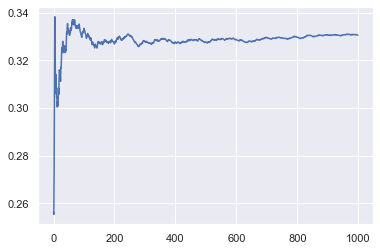

In [387]:
f=f1
alpha1=1

X1=simulation_K(f,1000,alpha1)
plt.plot(X1)

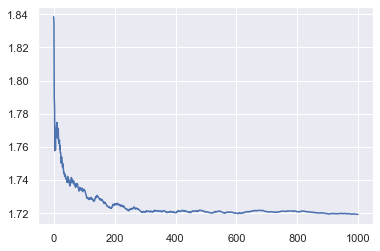

In [388]:
f=f2
alpha2=6*(3-np.exp(1))

X2=simulation_K(f,1000,alpha2)
plt.plot(X2)

## (S) Comparaison avec la méthode des variables antithétiques

In [389]:
def Comparateur(f,n,alpha,M):
    I=integrate.quad(lambda x: f(x),0,1)[0]
    X=[]
    Y=[]
    Compteur=0
    for j in range(M):
        S=0
        T=0
        for i in range(n):
            U=np.random.random()
            S=S+f(U)-alpha*(U-1/2)
            T=T+(f(U)+f(1-U))
        X.append(S/(n))
        Y.append(T/(2*n))
        diffS=np.abs(S/n-I)
        diffT=np.abs(T/(2*n)-I)
        if(diffS>diffT):
            Compteur+=1
    return Compteur/M,np.mean(X),np.mean(Y)

f=f1
alpha=alpha1

(a,b,c)=Comparateur(f,30,alpha,1000)

print("La méthode des variables de contrôle est meilleure que la méthode des variables antithétiques dans : "+ str(100-a*100) +"% des cas. Pour les paramètres suivants (n ="+str(n)+", M="+str(M)+"), on obtiens les résultats suivants")
print("- "+ str(b) +" comme moyenne empirique pour la méthode des variables de contrôle ")
print("- "+ str(c) +" comme moyenne empirique pour la méthode des variables antithétiques ")


La méthode des variables de contrôle est meilleure que la méthode des variables antithétiques dans : 61.7% des cas. Pour les paramètres suivants (n =50, M=200), on obtiens les résultats suivants
- 0.33304102237155264 comme moyenne empirique pour la méthode des variables de contrôle 
- 0.33304102237155264 comme moyenne empirique pour la méthode des variables antithétiques 


In [390]:
f=f2
alpha=alpha2

(a,b,c)=Comparateur(f,30,alpha,1000)

print("La méthode des variables de contrôle est meilleure que la méthode des variables antithétiques dans : "+ str(100-a*100) +"% des cas. Pour les paramètres suivants (n ="+str(n)+", M="+str(M)+"), on obtiens les résultats suivants")
print("- "+ str(b) +" comme moyenne empirique pour la méthode des variables de contrôle ")
print("- "+ str(c) +" comme moyenne empirique pour la méthode des variables antithétiques ")

La méthode des variables de contrôle est meilleure que la méthode des variables antithétiques dans : 47.4% des cas. Pour les paramètres suivants (n =50, M=200), on obtiens les résultats suivants
- 1.7184611107982195 comme moyenne empirique pour la méthode des variables de contrôle 
- 1.7184262873261784 comme moyenne empirique pour la méthode des variables antithétiques 


Les deux méthodes donnent des résultats extrêmement similaires (parfois jusqu'à 10^(-8)) près. De manière générale, la méthode des variables de contrôle offre un meilleur résultat avec un avantage assez conséquent sur la variable antithétique dans le cas de x^2 (environ 60% des cas offrent une meilleure approximation de I), mais est très légèrement moins performante dans le cas de exp(x) (environ 48 % des cas offrent une meilleure approximation de I)


<div style="text-align:left"> <font size=4>  <bold> 3. En pratique, $\alpha^{*}$ n'est pas connu. On se propose donc de l'estimer par une méthode de Monte-Carlo et on considère donc $ \tilde{K_{n}} $  </bold>  </span></div> 

In [391]:
def K_tilde(f,n):
    U=np.random.random(n)
    Y=U-1/2
    alpha=(1/n*sum(f(U)*Y)-(1/n*sum(f(U))*(1/n*sum(Y))))/(1/n*sum(Y*Y)-(1/n*sum(Y))**2)
    return 1/n*sum(f(U)-alpha*Y)

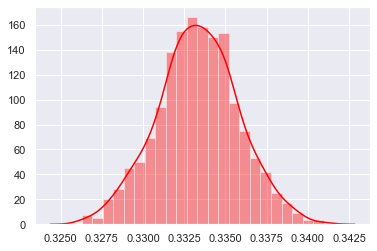

In [392]:
X=[]
f=f1
for i in range(1000):
    X.append(K_tilde(f,1000))
sns.distplot(X,color='red')

En prenant un N arbitrairement grand, on voit que les valeurs se concentrent autour de I. On peut également montrer la convergence numériquement. En effet :

In [393]:
X=[]
f=f1
for n in [10,100,1000]:
    for i in range(n):
        X.append(K_tilde(f,n))
    print("Pour n = "+str(n)+" : on obtient une moyenne empirique de "+str(np.mean(X)))

Pour n = 10 : on obtient une moyenne empirique de 0.32588177732036316
Pour n = 100 : on obtient une moyenne empirique de 0.33269072374456377
Pour n = 1000 : on obtient une moyenne empirique de 0.33327708473415946


On fait de même pour f2 :

In [394]:
X=[]
f=f2
for n in [10,100,1000]:
    for i in range(n):
        X.append(K_tilde(f,n))
    print("Pour n = "+str(n)+" :  on obtient une moyenne empirique de "+str(np.mean(X)))

Pour n = 10 :  on obtient une moyenne empirique de 1.7025437287966985
Pour n = 100 :  on obtient une moyenne empirique de 1.7165067787163797
Pour n = 1000 :  on obtient une moyenne empirique de 1.718010277476529


<div class="alert alert-block alert-info"> 
On constate ainsi dans les deux cas que la moyenne empirique converge vers I, ainsi on peut conjecturer que la limite en probabilité de Kn tilde est I.

In [395]:
def Comparateur2(f,n,alpha,M):
    I=integrate.quad(lambda x: f(x),0,1)[0]
    X=[]
    Y=[]
    Compteur=0
    for j in range(M):
        X.append(K_tilde(f,n))
        Y.append(K_étoile(f,n,alpha))
        diffS=np.abs(X[-1]-I)
        diffT=np.abs(Y[-1]-I)
        if(diffS>diffT):
            Compteur+=1
    return Compteur/M,np.mean(X),np.mean(Y)

f=f1
alpha=alpha1

(a,b,c)=Comparateur2(f,10,alpha,1000)

print("K_tilde est meilleure que K_étoile dans : "+ str(100-a*100) +"% des cas. Pour les paramètres suivants pour n = 10, on obtient les résultats suivants")
print("- "+ str(b) +" comme moyenne empirique pour K_tilde ")
print("- "+ str(c) +" comme moyenne empirique pour K_étoile ")

K_tilde est meilleure que K_étoile dans : 43.8% des cas. Pour les paramètres suivants pour n = 10, on obtient les résultats suivants
- 0.3245224972335134 comme moyenne empirique pour K_tilde 
- 0.33377779039882916 comme moyenne empirique pour K_étoile 


In [396]:
f=f1
alpha=alpha1
(a,b,c)=Comparateur2(f,25,alpha,1000)

print("K_tilde est meilleure que K_étoile dans : "+ str(100-a*100) +"% des cas. Pour les paramètres suivants pour n = 25, on obtient les résultats suivants")
print("- "+ str(b) +" comme moyenne empirique pour K_tilde ")
print("- "+ str(c) +" comme moyenne empirique pour K_étoile ")

K_tilde est meilleure que K_étoile dans : 47.699999999999996% des cas. Pour les paramètres suivants pour n = 25, on obtient les résultats suivants
- 0.330590022929834 comme moyenne empirique pour K_tilde 
- 0.334356759135305 comme moyenne empirique pour K_étoile 


In [397]:
f=f2
alpha=alpha2

(a,b,c)=Comparateur2(f,10,alpha,1000)

print("K_tilde est meilleure que K_étoile dans : "+ str(100-a*100) +"% des cas. Pour les paramètres suivants pour n = 10, on obtient les résultats suivants")
print("- "+ str(b) +" comme moyenne empirique pour K_tilde ")
print("- "+ str(c) +" comme moyenne empirique pour K_étoile ")

K_tilde est meilleure que K_étoile dans : 41.0% des cas. Pour les paramètres suivants pour n = 10, on obtient les résultats suivants
- 1.7107667910897457 comme moyenne empirique pour K_tilde 
- 1.7182178264693913 comme moyenne empirique pour K_étoile 


In [398]:
f=f2
alpha=alpha2
(a,b,c)=Comparateur2(f,25,alpha,1000)

print("K_tilde est meilleure que K_étoile dans : "+ str(100-a*100) +"% des cas. Pour les paramètres suivants pour n = 25, on obtient les résultats suivants")
print("- "+ str(b) +" comme moyenne empirique pour K_tilde ")
print("- "+ str(c) +" comme moyenne empirique pour K_étoile ")

K_tilde est meilleure que K_étoile dans : 47.4% des cas. Pour les paramètres suivants pour n = 25, on obtient les résultats suivants
- 1.7160488627198236 comme moyenne empirique pour K_tilde 
- 1.7192471504476168 comme moyenne empirique pour K_étoile 


Comme on pouvait s'y attendre, la méthode des variables de contrôle avec estimation du paramètre $\alpha_{n}$ donne des résultats légèrement moins bons que celle avec utilisation de $\alpha^{*}$. L'estimateur $ K^{\alpha^{*} }_{n} $ se comporte donc mieux

## (Facultatif) Proposer une méthode pour évaluer numériquement $ \mathrm{Var}( \tilde{K_{n} } )$. Pour $ n = 10, 25 $, et $f(x)=x^{2},\exp{(x)}$ 

Pour cela, on utilise l'estimateur de la variance empirique $\hat{S_{N-1}}$ pour estimer $\mathrm{Var}(\mathrm{\tilde{K_n}})$ :

In [399]:
#Pour f1
f=f1

#n=10
n=10
X=[]
for i in range(N):
    X.append(K_tilde(f,n))  
print("L'estimateur de la variance empirique pour K tilde " + str(n) +" vaut : " + str(np.std(X)**2))
A=np.std(X)**2

#n=25
n=25
X=[]
for i in range(N):
    X.append(K_tilde(f,n))  
print("L'estimateur de la variance empirique pour K tilde "+ str(n) + " vaut : " + str(np.std(X)**2))
B=np.std(X)**2

L'estimateur de la variance empirique pour K tilde 10 vaut : 0.0008189243211416038
L'estimateur de la variance empirique pour K tilde 25 vaut : 0.00025713552409502207


In [400]:
#Pour f1
f=f1
alpha=alpha1
#n=10
n=10
X=[]
for i in range(N):
    X.append(K_étoile(f,n,alpha))  
print("L'estimateur de la variance empirique pour K étoile " + str(n) +" vaut : " + str(np.std(X)**2))
C=np.std(X)**2

#n=25
n=25
X=[]
for i in range(N):
    X.append(K_étoile(f,n,alpha))  
print("L'estimateur de la variance empirique pour K étoile "+ str(n) + " vaut : " + str(np.std(X)**2))
D=np.std(X)**2

L'estimateur de la variance empirique pour K étoile 10 vaut : 0.0005621157102039216
L'estimateur de la variance empirique pour K étoile 25 vaut : 0.0002235629504941146


In [401]:
print("Pour f1 :")
print(" - Pour n=10 : La variance de K tilde ("+f"{str(A):.6}"+") est supérieure à celle de K étoile ("+f"{str(C):.6}"+")" if A>C else "La variance de K tilde "+(str(A))+" est inférieure à celle de K étoile ("+str(C)+")")
print(" - Pour n=25 : La variance de K tilde ("+f"{str(B):.8}"+") est supérieure à celle de K étoile ("+f"{str(D):.8}"+")" if B>D else "La variance de K tilde "+f"{str(B):.8}"+" est inférieure à celle de K étoile ("+f"{str(D):.8}"+")")

Pour f1 :
 - Pour n=10 : La variance de K tilde (0.0008) est supérieure à celle de K étoile (0.0005)
 - Pour n=25 : La variance de K tilde (0.000257) est supérieure à celle de K étoile (0.000223)


In [402]:
#Pour f2
f=f2

#n=10
n=10
X=[]
for i in range(N):
    X.append(K_tilde(f,n))  
print("L'estimateur de la variance empirique pour K tilde " + str(n) +" vaut : " + str(np.std(X)**2))
A=np.std(X)**2

#n=25
n=25
X=[]
for i in range(N):
    X.append(K_tilde(f,n))  
print("L'estimateur de la variance empirique pour K tilde "+ str(n) + " vaut : " + str(np.std(X)**2))
B=np.std(X)**2

L'estimateur de la variance empirique pour K tilde 10 vaut : 0.0005875288893750994
L'estimateur de la variance empirique pour K tilde 25 vaut : 0.00017637260699999437


In [403]:
#Pour f1
f=f2
alpha=alpha2
#n=10
n=10
X=[]
for i in range(N):
    X.append(K_étoile(f,n,alpha))  
print("L'estimateur de la variance empirique pour K étoile " + str(n) +" vaut : " + str(np.std(X)**2))
C=np.std(X)**2

#n=25
n=25
X=[]
for i in range(N):
    X.append(K_étoile(f,n,alpha))  
print("L'estimateur de la variance empirique pour K étoile "+ str(n) + " vaut : " + str(np.std(X)**2))
D=np.std(X)**2

L'estimateur de la variance empirique pour K étoile 10 vaut : 0.000393792119465794
L'estimateur de la variance empirique pour K étoile 25 vaut : 0.00015735980293474282


In [404]:
print("Pour f2 :")
print(" - Pour n=10 : La variance de K tilde ("+f"{str(A):.6}"+") est supérieure à celle de K étoile ("+f"{str(C):.6}"+")" if A>C else "La variance de K tilde "+(str(A))+" est inférieure à celle de K étoile ("+str(C)+")")
print(" - Pour n=25 : La variance de K tilde ("+f"{str(B):.8}"+") est supérieure à celle de K étoile ("+f"{str(D):.8}"+")" if B>D else "La variance de K tilde "+f"{str(B):.8}"+" est inférieure à celle de K étoile ("+f"{str(D):.8}"+")")

Pour f2 :
 - Pour n=10 : La variance de K tilde (0.0005) est supérieure à celle de K étoile (0.0003)
 - Pour n=25 : La variance de K tilde (0.000176) est supérieure à celle de K étoile (0.000157)


Ainsi on a montré empiriquement dans le cas n = 10,25 et pour f=x^2 et f = exp(x), que la variance de K tilde était supérieure à celle de K étoile

# <u> Initiative personnelle : </u>  tests statistiques (comparaison entre la méthode de Monte-Carlo et la méthode des variables antithétiques)

<em> L'année dernière, à l'université Paris-Sud, nous avons étudier diverses méthodes de tests statistiques notamment le Test de Fischer pour comparer les variances entre deux populations. J'aimerai ici utiliser un test de Fischer pour essayer de voir si les variances entre les deux méthodes sont différentes ou non, et donc voir si la méthode des variables antithétiques est réellement meilleure. </em>

<div style="text-align:left"><span style=" font-family:Georgia; font-size:1.2em;"> <u> <bold> Pour cela, on met en place le test suivant :  </bold> </u> </span></div>

Soient deux variables aléatoires :
- $X^{(n)} $ de même loi que $ J_{2n} $
<br>
- $Y^{(n)} $ de même loi que $ I_{2n} $

On considère pour $ N = 10 000 $ , deux échantillons $ \big( X^{(n)}_{1}...X^{(n)}_{N} \big) $ et $ \big( Y^{(n)}_{1} ... Y^{(n)}_{N} \big) $, de lois respectives $X^{(n)}$ et $Y^{(n)}$. On note par ailleurs $\sigma_{1}^{2}$ et  $\sigma_{2}^{2}$ les variances respectives des deux variables aléatoires considérées (qui dépendent de $n$, je n'ai pas voulu surcharger de notations ...)

> $ \large \mathrm{H}_{0} : $ $ \sigma_{1}^{2} = \sigma_{2}^{2} $
<br>
> $ \large \mathrm{H}_{1} : $ $ \sigma_{1}^{2} > \sigma_{2}^{2} $

In [405]:
# Paramètres: j'invite l'utilisateur a faire plusieurs simulations, et à modifier les paramètres 
N=4999
n=30

#Fonctions choisie pour l'étude
f=f1

In [406]:
def Echantillons(N,n,f):
    pop_1=[]
    pop_2=[]
    for i in range(N):
        pop_1.append(J(n,f))
        pop_2.append(IT(n,f))
    
    #Les éhchantillons considérés sont bien indépendants

    #On crée un DataFrame, qui contient nos deux populations
    data={'population_1':pop_1}
    Populations=pd.DataFrame(data)
    Populations['population_2']=pop_2
    return Populations

Populations=Echantillons(N=N,n=n,f=f)
Populations.head()

,population_1,population_2
0,0.305671,0.344345
1,0.314465,0.323504
2,0.321402,0.344507
3,0.312055,0.339267
4,0.354132,0.360433


## Tentative 1 : utilisation d'un test de Fischer

In [407]:
#Pour appliquer le test de Fischer, on a trois hypothèses fortes :
# Premier test à effectuer : la distribution des échantillons est normale

#Pour montrer que la distribution est normale, on utilise le test de Shapiroz-Wilks :
#H0 : L'échantillon est issu d'une population normalement distribuée
#Si la p-valeur >.05, on rejette l'hypothèse de distribution normale

Nom_Pop=['population_1','population_2']

for pop in Nom_Pop:
    print("{}:{}".format(pop,stats.shapiro(Populations[pop])))
    if(stats.shapiro(Populations[pop])[1]<0.05):
        print("p-valeur = "+ str(stats.shapiro(Populations[pop])[1]) +"  TEST REJETE")
    else:
        print("p-valeur = "+ str(stats.shapiro(Populations[pop])[1]) +"  TEST ACCEPTE")

population_1:(0.9990583658218384, 0.00700273085385561)
p-valeur = 0.00700273085385561  TEST REJETE
population_2:(0.9986523389816284, 0.0003396784595679492)
p-valeur = 0.0003396784595679492  TEST REJETE


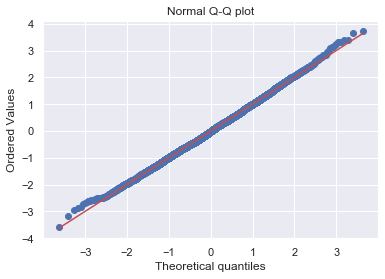

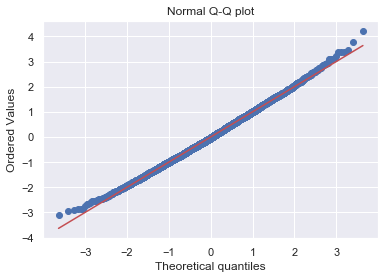

In [408]:
for pop in Nom_Pop:
    obs=Populations[pop]
    z = (obs-np.mean(obs))/np.std(obs)
    stats.probplot(z, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    plt.show()

<b> D'après nos données, il semble que l'échantillon n'a pas une distribution gaussienne.
    <br>
On ne peut pas utiliser le test de Fischer pour la variance </b>

## Tentative 2 : Utilisation d'un autre test 

In [409]:
#On teste d'abord l'indépendance de nos deux échantillons
# H0 : les deux échantillons sont indépendants
# H1 : les deux échantillons ne sont pas indépendants

from scipy.stats import chi2_contingency
p=stats.chi2_contingency(Populations['population_1'],Populations['population_2'])
if(p[1]>0.05): 
    print("P-VALEUR = "+ str(p[1])+ ": TEST ACCEPTE : les échantillons sont indépendants")
if(p[1]<0.05): 
    print("P-VALEUR = " + str(p[1])+ ": TEST REJETE : les échantillons ne sont pas indépendants")

P-VALEUR = 1.0: TEST ACCEPTE : les échantillons sont indépendants


In [410]:
#On fait un test de Levene, qui permet de comparer les variances des échantillons sans l'hypothèse de distribution gaussienne
#On peut appliquer ce test, car l'hypothèse d'indépendance a été validée à la question précédente

#Le test qu'on va effectuer sera unilatéral car on veut savoir si la méthode des variables antithétiques permet réellement de diminuer la variance :
# H0 : sigma1^2 = sigma2^2
# H1 : sigma1^2 > sigma2^2
p=stats.levene(Populations['population_1'],Populations['population_2'])
p

LeveneResult(statistic=4724.729302481677, pvalue=0.0)

<div class="alert alert-block alert-info"> On a simultanément :
<ul>
    <li> t > 0 </li>
    <li> $\frac{p-valeur}{2} < \space .05 $ </li>
    </ul>
Par conséquent, on rejette $H_{0}$, et $H_{1}$ est vérifiée : ainsi on a bien montré que la méthode des variables antithétiques permettait dans le cas de $ f(x) = x^{2} $ de réduire la variance.

In [411]:
Populations=Echantillons(N,n,f3)
testindep=stats.chi2_contingency(Populations['population_1'],Populations['population_2'])
print("P-valeur test Khi deux : ",testindep[1])
print("")
print("-------------")
S=stats.levene(Populations['population_1'],Populations['population_2'])
print("Résultats du test de Leven:")
print(" Statistique de test : ",S[0])
print(" P-valeur : ",S[1])
print("~~TEST ACCEPTE ~~")

P-valeur test Khi deux :  1.0

-------------
Résultats du test de Leven:
 Statistique de test :  1.086038770428944
 P-valeur :  0.29737576210043454
~~TEST ACCEPTE ~~


<u> NB </u> : il est très intéressant de faire les mêmes tests avec f3, qui est non monotone. J'ai trouvé des p-valeurs très élevées, allant de 0.3 à 0.85, ce qui nous conduit dans le cas de la fonction monotone à rejetter H0. La statistique de test étant généralement nulle, on a dans le cas de la fonction non monotone une égalité des variances. 
<br>
Ainsi, la méthode des variables antithétiques est efficace dans le cas des fonctions monotones, mais on a vu qu'elle n'était pas forcément efficace dans le cas des fonctions qui n'étaient pas monotones